In [52]:
#Import & setup

In [21]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
import matplotlib.pyplot as plt

In [34]:
X_train = np.loadtxt(r'data',delimiter = ',')
Y_train = np.loadtxt(r'data',delimiter = ',')

X_test = np.loadtxt(r'data',delimiter = ',')
Y_test = np.loadtxt(r'data',delimiter = ',')

In [35]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [36]:
print('Shape of X_train: ', X_train.shape)
print('Shape of Y_train: ', Y_train.shape)

print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


1957


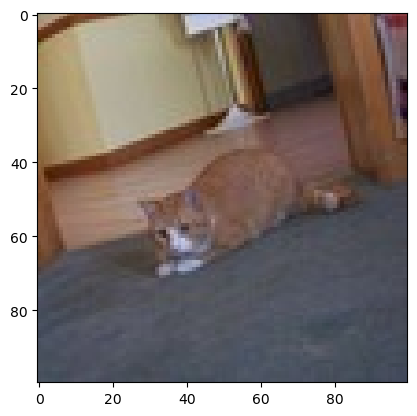

In [50]:
idx = random.randint(0, len(X_train))
print(idx)
plt.imshow(X_train[idx, :])
plt.show()

In [51]:
#Model

In [55]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)), 
    
    Conv2D(32, (3,3), activation='relu'), 
    MaxPooling2D((2,2)),
                 
    Flatten(), 
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Schalk\Environments\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [65]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9064 - loss: 0.2408
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9119 - loss: 0.2256
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9336 - loss: 0.1879
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9488 - loss: 0.1701
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9407 - loss: 0.1587


In [66]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6278 - loss: 1.1318


[0.815349817276001, 0.7049999833106995]

In [67]:
# Making predictions

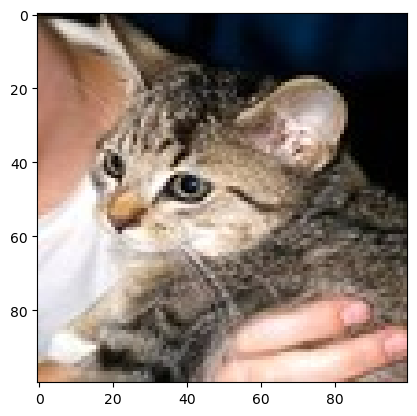

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Our model predicts that this is a picture of a: cat


In [84]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog';
else:
    pred = 'cat'
    
print("Our model predicts that this is a picture of a:", pred)